In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import re
from urllib.request import Request, urlopen
import os
import matplotlib.pyplot as plt
path_to_save = '/content/drive/MyDrive/Buildings project1'
response = urlopen('https://github.com/NREL/EnergyPlus/raw/develop/weather/master.geojson')
data = json.loads(response.read().decode('utf8'))

In [ ]:
pip install psychrolib

  Preparing metadata (setup.py) ... done
  Created wheel for psychrolib: filename=PsychroLib-2.5.0-py3-none-any.whl size=9767 sha256=5083ac46ac1e0cb40cacba303c9935866617ea02178cb928d929af6309971d2e
  Stored in directory: /root/.cache/pip/wheels/98/ac/06/7a5fa29ac5ae04906c453ec341aa03195cbe1616aca12eedbe
Successfully built psychrolib


In [ ]:
#Weather condition
path_input_data="/content/drive/MyDrive/Buildings project1/Inputs/Example1/Input_data.xlsx"
Input_data= pd.read_excel(path_input_data,  index_col = 0, header = 0)

city_name=Input_data.loc["City_name","Value"]
my_str=[city_name]
count = 0
for Location in data['features']:
  if any( town in Location['properties']['title'] for town in my_str):
    file_type='ddy'
    match = re.search(r'href=[\'"]?([^\'" >]+)', Location['properties'][file_type])
    if match:
      url = match.group(1)
      name = url[url.rfind('/') + 1:]
      count += 1
      print(count, ':', name, '\t')
      response = Request(url, headers={'User-Agent' : "Magic Browser"})

      with open(os.path.join(path_to_save,name), 'wb') as f:
        f.write(urlopen(response).read())

import sys
sys.path.append("/content/drive/MyDrive/Buildings project1")
import Module_project1
Module_project1.filename_extractor(city_name,path_to_save)

path_to_read="/content/drive/MyDrive/Buildings project1"
file_name=Module_project1.filename_extractor(city_name,path_to_save)

import sys
sys.path.append("/content/drive/MyDrive/Buildings project1")
import Module_project1
Latitude,Max_DB_after_heating99,Max_DB_after_cooling,DailyRange_cooling1,WB_atMaxDB_cooling=Module_project1.extract_DDweather(file_name,path_to_read)

delta_T_heating=20-float(Max_DB_after_heating99)
delta_T_cooling=float(Max_DB_after_cooling)-24
DR=float(DailyRange_cooling1)

print (f'The Latitude is {Latitude}\nMaxDB for the heating 99 is {Max_DB_after_heating99}\
\nMAXDB for cooling 1% is {Max_DB_after_cooling}\nMAX DB range for cooling 1% is {DailyRange_cooling1} \nWetbulb at maximum DB temperature is {WB_atMaxDB_cooling}' )

1 : ITA_Piacenza.160840_IGDG.ddy 	
The Latitude is 44.92
MaxDB for the heating 99 is -4.7
MAXDB for cooling 1% is 31.8
MAX DB range for cooling 1% is 11.9 
Wetbulb at maximum DB temperature is 22.4


In [19]:
#U values
RLF_table_path_input="/content/drive/MyDrive/Buildings project1/Inputs/Example1"
path_input_file_wall=os.path.join(RLF_table_path_input,"Input_wall.xlsx")
input_file_wall=pd.read_excel(path_input_file_wall,index_col=0,header=0)

def R_calculator(row):
  Element=row["element"]
  path_R_file=os.path.join("/content/drive/MyDrive/Buildings project1","R.xlsx")
  R_file=pd.read_excel(path_R_file,index_col=0,header=0)
  R_value=(R_file.loc[Element,"R"])/(R_file.loc[Element,"standard_length"])
  return(R_value)

input_file_wall.loc[:,"R_Value"]=input_file_wall.apply(R_calculator,axis=1)*(input_file_wall.loc[:,"length"])
R_series=input_file_wall.loc[:,"R_conf"]=="Series"
Resistancelist_series=input_file_wall.loc[R_series,:]

path_R_file=os.path.join("/content/drive/MyDrive/Buildings project1","R.xlsx")
R_file=pd.read_excel(path_R_file,index_col=0,header=0)

Total_Resistance_in_series=sum(Resistancelist_series.loc[:,"R_Value"])
Total_Resistance_in_series=sum(Resistancelist_series.loc[:,"R_Value"])
U_wall_winter=(1/(Total_Resistance_in_series+input_file_wall.loc["R4","R_Value"]))*input_file_wall.loc["R4","volume"] + (1/(Total_Resistance_in_series+input_file_wall.loc["R5","R_Value"]))*input_file_wall.loc["R5","volume"]
U_wall_summer=(1/(Total_Resistance_in_series+input_file_wall.loc["R4","R_Value"]))*input_file_wall.loc["R4","volume"] + (1/(Total_Resistance_in_series+input_file_wall.loc["R5","R_Value"]))*input_file_wall.loc["R5","volume"]

path_input_file_door=os.path.join(RLF_table_path_input,"Input_door.xlsx")
input_file_door=pd.read_excel(path_input_file_door,index_col=0,header=0)


def R_calculator(row):
  Element=row["element"]
  path_R_file=os.path.join("/content/drive/MyDrive/Buildings project1","R.xlsx")
  R_file=pd.read_excel(path_R_file,index_col=0,header=0)
  R_value=(R_file.loc[Element,"R"])/(R_file.loc[Element,"standard_length"])
  return(R_value)

input_file_door.loc[:,"R_Value"]=input_file_door.apply(R_calculator,axis=1)*(input_file_door.loc[:,"length"])
R_series=input_file_door.loc[:,"R_conf"]=="Series"
Resistancelist_series=input_file_door.loc[R_series,:]

path_R_file=os.path.join("/content/drive/MyDrive/Buildings project1","R.xlsx")
R_file=pd.read_excel(path_R_file,index_col=0,header=0)

Total_Resistance_in_series_winter=sum(Resistancelist_series.loc[:,"R_Value"])+R_file.loc["Outside surface (winter)","R"]
Total_Resistance_in_series_summer=sum(Resistancelist_series.loc[:,"R_Value"])+R_file.loc["Outside surface (summer)","R"]
U_door_winter=(1/(Total_Resistance_in_series_winter+input_file_door.loc["R4","R_Value"]))
U_door_summer=(1/(Total_Resistance_in_series_summer+input_file_door.loc["R4","R_Value"]))

In [ ]:
#Opaque Surfaces
path_Area_file=os.path.join(RLF_table_path_input,"Area.xlsx")
Area_file=pd.read_excel(path_Area_file,index_col=0,header=0)
U_ceiling=Input_data.loc["U_roof_winter","Value"]

name=["walls","ceiling","door"]
area=[Area_file.loc["walls","area"],Area_file.loc["ceiling","area"],Area_file.loc["door","area"]]
U_heating=[U_wall_winter,U_ceiling,U_door_winter]
heating_factor=[]
Q_heating=[]
U_cooling=[U_wall_summer,U_ceiling,U_door_summer]
cooling_factor=[]
Q_cooling=[]

OS_listoflists=[area,U_heating,heating_factor,Q_heating,U_cooling,cooling_factor,Q_cooling]
OS_DF=pd.DataFrame(OS_listoflists,index=["Area","U_Heating","HF","Q_Heating","U_Cooling","CF","Q_Cooling"],columns=name)
OS_DF=OS_DF.transpose()

roof_material=Input_data.loc["Roof_material","Value"]
roof_color=Input_data.loc["Roof_color","Value"]
path_RoofSolarAbsorptance_file = os.path.join("/content/drive/MyDrive/Buildings project1", "RoofSolarAbsorptance.xlsx")
RoofSolarAbsorptance_file = pd.read_excel(path_RoofSolarAbsorptance_file, index_col=0, header=0)
alpha_value = RoofSolarAbsorptance_file.loc[roof_material, roof_color]

OS_DF.loc[:,"HF"]=OS_DF.loc[:,"U_Heating"]*delta_T_heating
OS_DF.loc[:,"Q_Heating"]=OS_DF.loc[:,"HF"]*OS_DF.loc[:,"Area"]
OS_DF.loc["walls","CF"]=OS_DF.loc["walls","U_Cooling"]*(delta_T_cooling+8.2-(0.36*DR))
OS_DF.loc["ceiling","CF"]=OS_DF.loc["ceiling","U_Cooling"]*(0.62*delta_T_cooling+(14.3*alpha_value-4.5)-(0.19*DR))
OS_DF.loc["door","CF"]=OS_DF.loc["door","U_Cooling"]*(delta_T_cooling+8.2-0.36*DR)
OS_DF.loc[:,"Q_Cooling"]=OS_DF.loc[:,"CF"]*OS_DF.loc[:,"Area"]

Q_os_heating=OS_DF.loc[:,"Q_Heating"].sum()
Q_os_cooling=OS_DF.loc[:,"Q_Cooling"].sum()

RLF_table_path_output="/content/drive/MyDrive/Buildings project1/Outputs/Example1"
OS_path=os.path.join(RLF_table_path_output,"OS.xlsx")
OS_DF.to_excel(OS_path)

print("Q Opaque Surfaces for Heating is : "+str(round(Q_os_heating,2))+"W and Q Opaque Surfaces for Cooling is : "+str(round(Q_os_cooling,2))+"W")

Q Opaque Surfaces for Heating is : 2466.63W and Q Opaque Surfaces for Cooling is : 1090.84W


In [ ]:
#Windows
path_windows_file = os.path.join(RLF_table_path_input,"Windows.xlsx")
Windows_file = pd.read_excel(path_windows_file, index_col =0, header = 0)

# E_Direct
def BeamIrrad_finder(row):
  direction=row["Direction"]
  path_files_folder = "/content/drive/MyDrive/Buildings project1"
  name_file_BeamIrrad = "BeamIrradiance.csv"
  path_file_BeamIrrad = os.path.join(path_files_folder,name_file_BeamIrrad)
  BeamIrrad_DF = pd.read_csv(path_file_BeamIrrad, sep=";", index_col = 0, header = 0)
  value_BeamIrrad = BeamIrrad_DF.loc[direction,"45"]
  return (value_BeamIrrad)
Windows_file.loc[:,"ED"] = Windows_file.apply(BeamIrrad_finder,axis=1)
# E diffuse
def DiffIrrad_finder(row):
  direction=row["Direction"]
  path_files_folder = "/content/drive/MyDrive/Buildings project1"
  name_file_DiffIrrad = "DiffuseIrradiance.csv"
  path_file_DiffIrrad = os.path.join(path_files_folder,name_file_DiffIrrad)
  DiffIrrad_DF = pd.read_csv(path_file_DiffIrrad, sep=";", index_col = 0, header = 0)
  value_DiffIrrad = DiffIrrad_DF.loc[direction,"45"]
  return (value_DiffIrrad)
Windows_file.loc[:,"Ed"] = Windows_file.apply(DiffIrrad_finder,axis=1)
#SLF
def SLF_finder(row):
  direction=row["Direction"]
  path_files_folder = "/content/drive/MyDrive/Buildings project1"
  name_file_SLF = "SLF.csv"
  path_file_SLF = os.path.join(path_files_folder,name_file_SLF)
  SLF_DF = pd.read_csv(path_file_SLF, sep=";", index_col = 0, header = 0)
  value_SLF = SLF_DF.loc[direction, "45"]
  return (value_SLF)
Windows_file.loc[:,"SLF"] = Windows_file.apply(SLF_finder,axis=1)
#F_shd
def F_shd_finder(row):
  SLF=row["SLF"]
  Xoh=row["Xoh"]
  Doh=row["Doh"]
  if row["Height"]==0:
    value_F_shd=0
  else:
    h=row["Height"]
    value_F_shd=min(1,max(0,(SLF*Doh-Xoh)/h))
    value_F_shd=round(value_F_shd,3)
  return (value_F_shd)
Windows_file.loc[:,"Fshd"] = Windows_file.apply(F_shd_finder,axis=1)
# PXI
def PXI_finder(row):
  Tx=row["Tx"]
  Ed=row["Ed"]
  ED=row["ED"]
  Fshd=row["Fshd"]
  if row["Height"]==0:
    value_PXI=0
  else:
    value_PXI=Tx*(Ed+(1-Fshd)*ED)
    value_PXI=round(value_PXI,3)
  return (value_PXI)
Windows_file.loc[:,"PXI"] = Windows_file.apply(PXI_finder,axis=1)
#IAC
def IAC_finder(row):
  Type=row["glazing_type"]
  ID=row["IntShading_ID"]
  path_files_folder = "/content/drive/MyDrive/Buildings project1"
  path_IAC_cl=os.path.join(path_files_folder,"IAC_cl.csv")
  IAC_DF=pd.read_csv(path_IAC_cl,sep=";",index_col=0,header=0)
  value_IAC_cl=IAC_DF.loc[Type,ID]
  value_IAC=1+0.4*(value_IAC_cl-1)
  return (value_IAC)
Windows_file.loc[:,"IAC"]=Windows_file.apply(IAC_finder,axis=1)
#FFs
type_of_family=Input_data.loc["Type of the house","Value"]
path_FFs_file = os.path.join("/content/drive/MyDrive/Buildings project1", "FFs.csv")
FFs_file = pd.read_csv(path_FFs_file, sep=";", index_col=0, header=0)

def FFs_finder(row):
  path_files_folder = "/content/drive/MyDrive/Buildings project1"
  path_FFs=os.path.join(path_files_folder,"FFs.csv")
  FFs_DF=pd.read_csv(path_FFs,sep=";",index_col=0,header=0)
  type_of_family=Input_data.loc["Type of the house","Value"]
  direction=row["Direction"]
  value_FFs=FFs_DF.loc[direction, type_of_family]
  return (value_FFs)
Windows_file.loc[:,"FFs"]=Windows_file.apply(FFs_finder,axis=1)

path_files_folder = "/content/drive/MyDrive/Buildings project1"
path_Fenestration_table_U=os.path.join(path_files_folder,"Fenestration_table_U.xlsx")
Fenestration_table_U_file=pd.read_excel(path_Fenestration_table_U,index_col=0,header=0)


path_Fenestration_table_SHGC=os.path.join(path_files_folder,"Fenestration_table_SHGC.xlsx")
Fenestration_table_SHGC_file=pd.read_excel(path_Fenestration_table_SHGC,index_col=0,header=0)

Windows_file.loc["windows_N_fixed","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_N_fixed","glazing_type"],Windows_file.loc["windows_N_fixed","frame"]]
Windows_file.loc["windows_N_operable","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_N_operable","glazing_type"],Windows_file.loc["windows_N_operable","frame"]]
Windows_file.loc["windows_E_fixed","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_E_fixed","glazing_type"],Windows_file.loc["windows_E_fixed","frame"]]
Windows_file.loc["windows_E_operable","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_E_operable","glazing_type"],Windows_file.loc["windows_E_operable","frame"]]
Windows_file.loc["windows_W_fixed","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_W_fixed","glazing_type"],Windows_file.loc["windows_W_fixed","frame"]]
Windows_file.loc["windows_W_operable","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_W_operable","glazing_type"],Windows_file.loc["windows_W_operable","frame"]]
Windows_file.loc["windows_S_fixed","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_S_fixed","glazing_type"],Windows_file.loc["windows_S_fixed","frame"]]
Windows_file.loc["windows_S_operable","U"]=Fenestration_table_U_file.loc[Windows_file.loc["windows_S_operable","glazing_type"],Windows_file.loc["windows_S_operable","frame"]]

Windows_file.loc["windows_N_fixed","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_N_fixed","glazing_type"],Windows_file.loc["windows_N_fixed","frame"]]
Windows_file.loc["windows_N_operable","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_N_operable","glazing_type"],Windows_file.loc["windows_N_operable","frame"]]
Windows_file.loc["windows_E_fixed","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_E_fixed","glazing_type"],Windows_file.loc["windows_E_fixed","frame"]]
Windows_file.loc["windows_E_operable","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_E_operable","glazing_type"],Windows_file.loc["windows_E_operable","frame"]]
Windows_file.loc["windows_W_fixed","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_W_fixed","glazing_type"],Windows_file.loc["windows_W_fixed","frame"]]
Windows_file.loc["windows_W_operable","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_W_operable","glazing_type"],Windows_file.loc["windows_W_operable","frame"]]
Windows_file.loc["windows_S_fixed","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_S_fixed","glazing_type"],Windows_file.loc["windows_S_fixed","frame"]]
Windows_file.loc["windows_S_operable","SHGC"]=Fenestration_table_SHGC_file.loc[Windows_file.loc["windows_S_operable","glazing_type"],Windows_file.loc["windows_S_operable","frame"]]

Windows_file.loc[:,"HF"]=delta_T_heating*Windows_file.loc[:,"U"]
Windows_file.loc[:,"Q_heating"]=Windows_file.loc[:,"area"]*Windows_file.loc[:,"HF"]

Windows_file.loc[:,"CF"]=Windows_file.loc[:,"U"]*(delta_T_cooling-0.46*DR)+Windows_file.loc[:,"PXI"]*Windows_file.loc[:,"SHGC"]*Windows_file.loc[:,"IAC"]*Windows_file.loc[:,"FFs"]
Windows_file.loc[:,"Q_cooling"]=Windows_file.loc[:,"area"]*Windows_file.loc[:,"CF"]

Q_fen_heating=Windows_file.loc[:,"Q_heating"].sum()
Q_fen_cooling=Windows_file.loc[:,"Q_cooling"].sum()

path_modifiedWindowsFile="/content/drive/MyDrive/Buildings project1/Outputs/Example1/Fenestration.xlsx"
Windows_file.to_excel(path_modifiedWindowsFile)

print("Q Fenestration for Heating is : "+str(round(Q_fen_heating,2))+"W and Q Fenestration for Cooling is : "+str(round(Q_fen_cooling,2))+"W")

Q Fenestration for Heating is : 2528.0W and Q Fenestration for Cooling is : 3885.72W


In [ ]:
#Internal gains
N_bd=Input_data.loc["Number of bedrooms","Value"]
N_oc=Input_data.loc["Number of occupants","Value"]
Area_cf=Area_file.loc["ceiling","area"]
q_ig_s=136+2.2*Area_cf+22*N_oc
q_ig_l=20+0.22*Area_cf+12*N_oc


#Infiltration - Calculating the flow

cons=Input_data.loc["Construction_quality","Value"]
path_UnitLeakageAreas_file=os.path.join("/content/drive/MyDrive/Buildings project1","UnitLeakageAreas.xlsx")
UnitLeakageAreas_file=pd.read_excel(path_UnitLeakageAreas_file,index_col=0,header=0)
A_ul=UnitLeakageAreas_file.loc[cons,"A_ul"]
A_es=Area_file.loc["ceiling","area"]+Area_file.loc["walls_tot","area"]
A_L=A_ul*A_es


path_IDF_file=os.path.join("/content/drive/MyDrive/Buildings project1","IDF.xlsx")
IDF_file=pd.read_excel(path_IDF_file,index_col=0,header=0)

import psychrolib
psychrolib.SetUnitSystem(psychrolib.SI)

omega_inside=psychrolib.GetHumRatioFromRelHum(24, 0.5, 101325)
omega_outside=psychrolib.GetHumRatioFromTWetBulb(float(Max_DB_after_cooling), float(WB_atMaxDB_cooling), 101325)
delta_omega=omega_outside-omega_inside

In [ ]:
# Interpolation of IDF parameter
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

# Загрузите таблицу Excel с заголовками
file_path = '/content/drive/MyDrive/Buildings project1/IDF.xlsx'
df = pd.read_excel(file_path)

df = df.set_index('Unnamed: 0')

# Define the input values you want to look up
value_1 = Area_file.loc["height","area"]
value_2_cooling = float(Max_DB_after_cooling)
value_2_heating = float(Max_DB_after_heating99)

# Cooling
# Check if the input values exist in the DataFrame
if value_1 in df.index and value_2_cooling in df.columns:
    # If both values are present in the DataFrame, retrieve the exact value
    result = df.loc[value_1, value_2_cooling]
else:
    # If one or both values are missing, perform linear interpolation
    row = df.index.get_loc(value_1, method='nearest')
    col = df.columns.get_loc(value_2_cooling, method='nearest')

    if value_1 > df.index[row]:
        row_below = row
        row_above = row + 1
    else:
        row_below = row - 1
        row_above = row

    if value_2_cooling > df.columns[col]:
        col_left = col
        col_right = col + 1
    else:
        col_left = col - 1
        col_right = col

    # Perform linear interpolation
    x1 = df.index[row_below]
    x2 = df.index[row_above]
    y1 = df.columns[col_left]
    y2 = df.columns[col_right]

    f_x1_y1 = df.loc[x1, y1]
    f_x1_y2 = df.loc[x1, y2]
    f_x2_y1 = df.loc[x2, y1]
    f_x2_y2 = df.loc[x2, y2]

    result_cooling = ((x2 - value_1) * (y2 - value_2_cooling) * f_x1_y1 +
              (x2 - value_1) * (value_2_cooling - y1) * f_x1_y2 +
              (value_1 - x1) * (y2 - value_2_cooling) * f_x2_y1 +
              (value_1 - x1) * (value_2_cooling - y1) * f_x2_y2) / ((x2 - x1) * (y2 - y1))

# Heating
# Check if the input values exist in the DataFrame
if value_1 in df.index and value_2_heating in df.columns:
    # If both values are present in the DataFrame, retrieve the exact value
    result = df.loc[value_1, value_2_heating]
else:
    # If one or both values are missing, perform linear interpolation
    row = df.index.get_loc(value_1, method='nearest')
    col = df.columns.get_loc(value_2_heating, method='nearest')

    if value_1 > df.index[row]:
        row_below = row
        row_above = row + 1
    else:
        row_below = row - 1
        row_above = row

    if value_2_heating > df.columns[col]:
        col_left = col
        col_right = col + 1
    else:
        col_left = col - 1
        col_right = col

    # Perform linear interpolation
    x1 = df.index[row_below]
    x2 = df.index[row_above]
    y1 = df.columns[col_left]
    y2 = df.columns[col_right]

    f_x1_y1 = df.loc[x1, y1]
    f_x1_y2 = df.loc[x1, y2]
    f_x2_y1 = df.loc[x2, y1]
    f_x2_y2 = df.loc[x2, y2]

    result_heating = ((x2 - value_1) * (y2 - value_2_heating) * f_x1_y1 +
              (x2 - value_1) * (value_2_heating - y1) * f_x1_y2 +
              (value_1 - x1) * (y2 - value_2_heating) * f_x2_y1 +
              (value_1 - x1) * (value_2_heating - y1) * f_x2_y2) / ((x2 - x1) * (y2 - y1))

print(f'IDF heating is {round(result_heating,3)}\nIDF cooling is {round(result_cooling,3)}' )

IDF heating is 0.072
IDF cooling is 0.032


<ipython-input-10-7b0c47229e74>:24: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  row = df.index.get_loc(value_1, method='nearest')
<ipython-input-10-7b0c47229e74>:25: FutureWarning: Passing method to Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  col = df.columns.get_loc(value_2_cooling, method='nearest')
<ipython-input-10-7b0c47229e74>:64: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  row = df.index.get_loc(value_1, method='nearest')
<ipython-input-10-7b0c47229e74>:65: FutureWarning: Passing method to Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  col = df.columns.get_loc(value_2_heating, method='nearest')


In [ ]:
V_infiltration_heating=float(result_heating)*A_L
V_infiltration_cooling=float(result_cooling)*A_L

V_ventilation=0.05*Area_cf+3.5*(N_bd+1)

V_inf_ven_heating=V_infiltration_heating+V_ventilation
V_inf_ven_cooling=V_infiltration_cooling+V_ventilation

C_s=Input_data.loc["C_Sensible","Value"]
C_l=Input_data.loc["C_Latent","Value"]
Q_inf_ven_heating_s=V_inf_ven_heating*C_s*delta_T_heating
Q_inf_ven_cooling_s=V_inf_ven_cooling*C_s*delta_T_cooling

In [ ]:
# Latent load due to infiltration
psychrolib.SetUnitSystem(psychrolib.SI)

TDryBulb=24
RelHum=0.5
Pressure=101325
HumRatio_inside=psychrolib.GetHumRatioFromRelHum(TDryBulb,RelHum,Pressure)

TMaxCool=float(Max_DB_after_cooling)
TMaxDB=float(WB_atMaxDB_cooling)
Pressure=101325
HumRatio_outside=psychrolib.GetHumRatioFromTWetBulb(TMaxCool, TMaxDB, Pressure)

delta_omega=HumRatio_outside-HumRatio_inside
Q_inf_ven_cooling_l=V_inf_ven_cooling*C_l*delta_omega

In [ ]:
#Distribution Losses
path_DuctLossGainFactors=os.path.join("/content/drive/MyDrive/Buildings project1","DuctLossGainFactors.csv")
DuctLossGainFactors_DF=pd.read_csv(path_DuctLossGainFactors,sep=";",index_col=1,header=0)

dist=Input_data.loc["Typical Dust Loss/Gain Factor","Value"]

f_dl_cooling=DuctLossGainFactors_DF.loc["A1",dist]
f_dl_heating=DuctLossGainFactors_DF.loc["A2",dist]

Q_subtot_sens_heating=Q_os_heating+Q_fen_heating+Q_inf_ven_heating_s
Q_losses_sens_heating=f_dl_heating*Q_subtot_sens_heating

Q_subtot_sens_cooling=Q_os_cooling+Q_fen_cooling+Q_inf_ven_cooling_s+q_ig_s
Q_losses_sens_cooling=f_dl_cooling*Q_subtot_sens_cooling

Q_tot_sens_heating=Q_subtot_sens_heating+Q_losses_sens_heating
Q_tot_sens_cooling=Q_subtot_sens_cooling+Q_losses_sens_cooling
Q_tot_latents_cooling=q_ig_l+Q_inf_ven_cooling_l

Q_Sensible Total for Heating is : 8602.65W


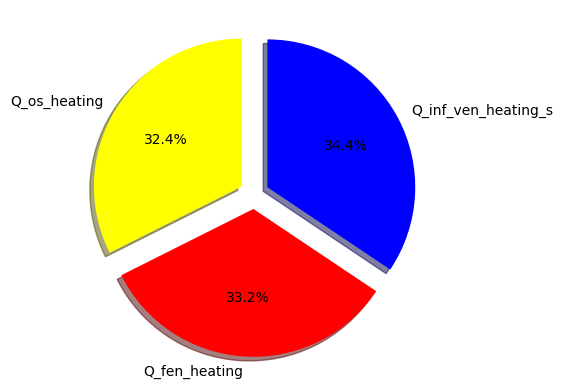

In [ ]:
#Q_tot_sens_heating

print("Q_Sensible Total for Heating is : "+str(round(Q_tot_sens_heating,2))+"W")

slices = [Q_os_heating,Q_fen_heating,Q_inf_ven_heating_s]
heating_sens=["Q_os_heating","Q_fen_heating","Q_inf_ven_heating_s"]
cols= ["yellow","#FF0000","b"]
plt.pie(slices,colors=cols , labels=heating_sens, startangle=90, shadow=True,explode=(.1,0.1,0.1), autopct="%1.1f%%")
Q_tot_sens_heating_plot_name="Q_tot_sens_heating.png"
path_toSave_thisFigure=os.path.join(RLF_table_path_output,Q_tot_sens_heating_plot_name)
plt.savefig(path_toSave_thisFigure)

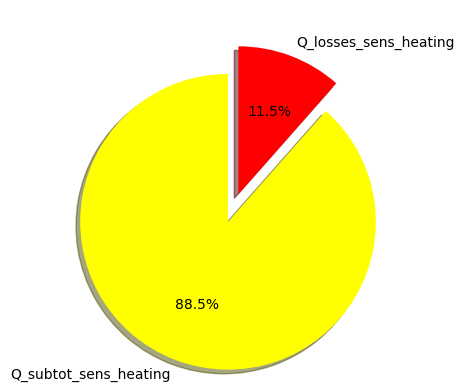

In [ ]:
#Q_subtot_sens_heating

slices = [Q_subtot_sens_heating,Q_losses_sens_heating]
heating_sens=["Q_subtot_sens_heating","Q_losses_sens_heating"]
cols= ["yellow","#FF0000"]
plt.pie(slices,colors=cols , labels=heating_sens, startangle=90, shadow=True,explode=(0.2,0), autopct="%1.1f%%")
Q_subtot_sens_heating_name="Q_subtot_sens_heating.png"
path_toSave_thisFigure=os.path.join(RLF_table_path_output,Q_subtot_sens_heating_name)
plt.savefig(path_toSave_thisFigure)

Q_Sensible Total for Cooling is : 7692.08W


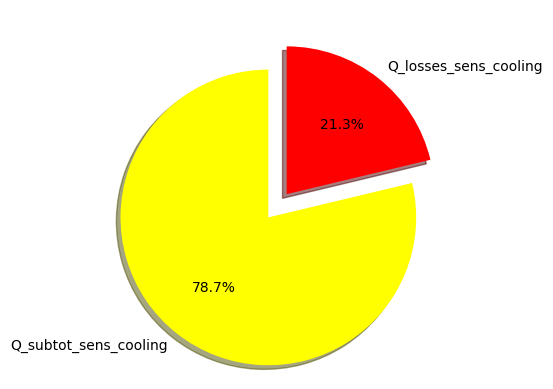

In [ ]:
#Q_tot_sens_cooling
print("Q_Sensible Total for Cooling is : "+str(round(Q_tot_sens_cooling,2))+"W")

slices = [Q_subtot_sens_cooling,Q_losses_sens_cooling]
heating_sens=["Q_subtot_sens_cooling","Q_losses_sens_cooling"]
cols= ["yellow","#FF0000"]
plt.pie(slices,colors=cols , labels=heating_sens, startangle=90, shadow=True,explode=(0.2,0), autopct="%1.1f%%")
Q_tot_sens_cooling_name="Q_tot_sens_cooling.png"
path_toSave_thisFigure=os.path.join(RLF_table_path_output,Q_tot_sens_cooling_name)
plt.savefig(path_toSave_thisFigure)

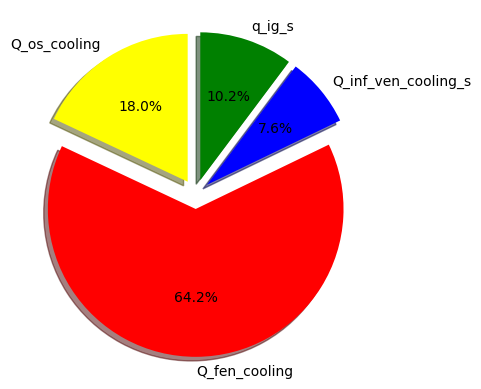

In [ ]:
#Q_subtot_sens_cooling

slices = [Q_os_cooling,Q_fen_cooling,Q_inf_ven_cooling_s,q_ig_s]
heating_sens=["Q_os_cooling","Q_fen_cooling","Q_inf_ven_cooling_s","q_ig_s"]
cols= ["yellow","#FF0000","b","g"]
plt.pie(slices,colors=cols , labels=heating_sens, startangle=90, shadow=True,explode=(0.1,0.1,0.1,.1), autopct="%1.1f%%")
Q_subtot_sens_cooling_name="Q_subtot_sens_cooling.png"
path_toSave_thisFigure=os.path.join(RLF_table_path_output,Q_subtot_sens_cooling_name)
plt.savefig(path_toSave_thisFigure)

Q_Latent Total for Cooling is : 642.05W


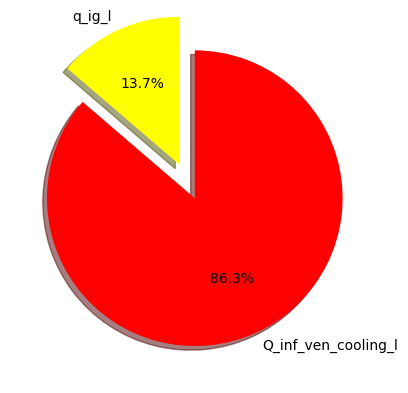

In [ ]:
#Q_tot_latents_cooling
print("Q_Latent Total for Cooling is : "+str(round(Q_tot_latents_cooling,2))+"W")

slices = [q_ig_l,Q_inf_ven_cooling_l]
heating_sens=["q_ig_l","Q_inf_ven_cooling_l"]
cols= ["yellow","#FF0000"]
plt.pie(slices,colors=cols , labels=heating_sens, startangle=90, shadow=True,explode=(0.25,0), autopct="%1.1f%%")
Q_tot_latents_cooling_name="Q_tot_latents_cooling.png"
path_toSave_thisFigure=os.path.join(RLF_table_path_output,Q_tot_latents_cooling_name)
plt.savefig(path_toSave_thisFigure)